In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Electricity Data

In [8]:
elec_df = pd.read_csv("data_test/Demand_for_California_(region)_hourly_-_UTC_time.csv", skiprows=5, names=["time", "MWH"])
elec_df["utc_time"] = pd.to_datetime(elec_df["time"])
elec_df["local_time"] = elec_df["utc_time"] + pd.Timedelta(hours=-8)

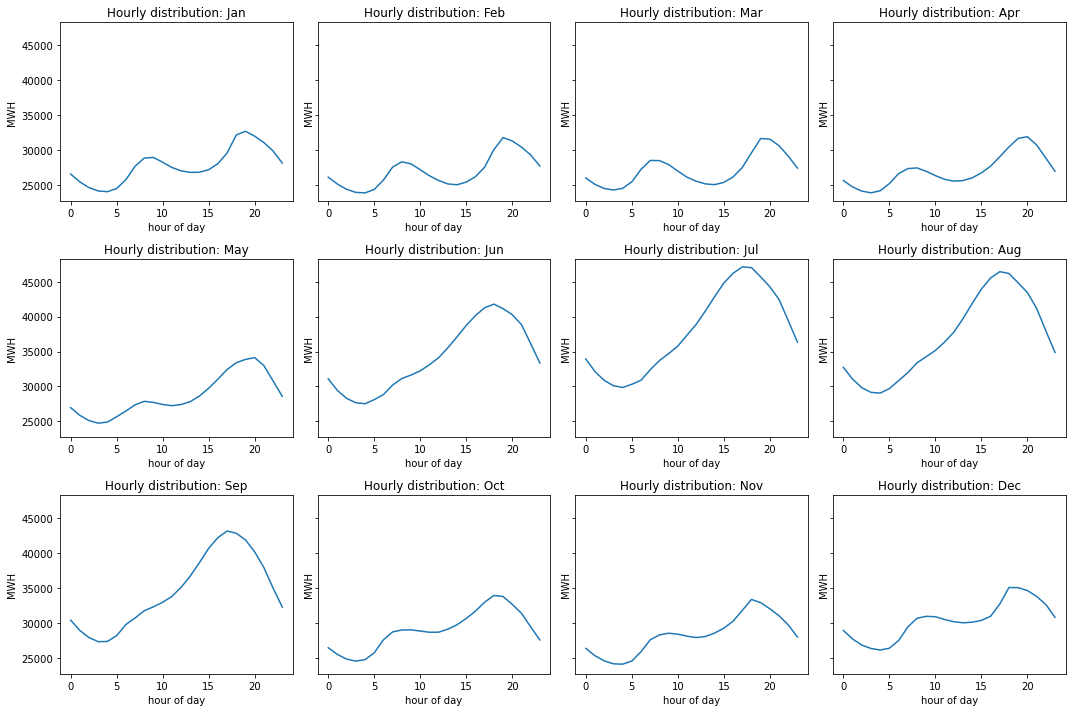

In [23]:
# uncomment the vis you want
# plt.plot(elec_df["MWH"]) # plot entire series
# plt.plot(elec_df[elec_df["local_time"].dt.year==2021]["MWH"]) # plot specific year


# summer_months = [6,7] 
# plt.plot(elec_df[elec_df["local_time"].dt.month.isin(summer_months) & 
#                  elec_df["local_time"].dt.year.isin([2021])]["MWH"]) # plot specific months and years

# elec_df.groupby([elec_df['local_time'].dt.hour, elec_df['local_time'].dt.month]).mean().loc[0] #groupby hours, months

# plot all hourly distributions over months in 2021
elec_df_2021 = elec_df[elec_df['local_time'].dt.year==2021]
fig, axs = plt.subplots(3, 4, sharey=True, figsize=(15,10))
for r in range(3):
    for c in range(4):
        axs[r][c].set_ylabel("MWH")
        axs[r][c].set_xlabel("hour of day")
        axs[r][c].set_title("Hourly distribution: " + datetime.datetime.strptime(str(r*4+c+1), "%m").strftime("%b"))
        axs[r][c].plot(elec_df_2021.groupby([elec_df_2021['local_time'].dt.month, elec_df_2021['local_time'].dt.hour]).mean().loc[r*4+c+1]["MWH"])
fig.tight_layout()